In [40]:
import pandas as pd

file = "/Users/diegoo.guajardoo/Documents/VS Code Studio/Data/Databases/movimientos fintonic marzo 2019 - junio 2022.csv"


In [41]:
df = pd.read_csv(file)


In [42]:
df.columns

Index(['Fecha valor', 'Fecha de operación', 'Importe', 'Moneda', 'Concepto',
       'Entidad', 'Nombre de producto', 'Tipo de producto',
       'Tipo de movimiento', 'Categoría', 'Nota'],
      dtype='object')

In [51]:
df["Fecha valor"] = pd.to_datetime(df["Fecha valor"], format="%d/%m/%y", exact=True)
df["Fecha de operación"] = pd.to_datetime(
    df["Fecha de operación"], format="%d/%m/%y", exact= True)
df.dtypes

Fecha valor           datetime64[ns]
Fecha de operación    datetime64[ns]
Importe                       object
Moneda                        object
Concepto                      object
Entidad                       object
Nombre de producto            object
Tipo de producto              object
Tipo de movimiento            object
Categoría                     object
Nota                          object
dtype: object

In [59]:
df["Importe"] = df["Importe"].str.replace(",","")
df["Importe"] = pd.to_numeric(df["Importe"])
df["Importe"].dtype


In [62]:
nomina = df[df["Nombre de producto"] == "SUPER NOMINA"]
aeromexico = df[df["Nombre de producto"] == "AEROMEXICO BLANCA"]
zero = df[df["Nombre de producto"] == "SANTANDER ZERO"]
nomina.head(20)

,Fecha valor,Fecha de operación,Importe,Moneda,Concepto,Entidad,Nombre de producto,Tipo de producto,Tipo de movimiento,Categoría,Nota
0,2022-06-21,2022-06-21,400.00,MXN,Abono transferencia enlace,Santander México,SUPER NOMINA,Cuenta,Ingreso,Transferencias,Tenis papa
1,2022-06-21,2022-06-21,400.00,MXN,Abono transferencia spei,Santander México,SUPER NOMINA,Cuenta,Ingreso,Transferencias,Regalo papa
2,2022-06-21,2022-06-21,18000.00,MXN,Abono transferencia spei,Santander México,SUPER NOMINA,Cuenta,Ingreso,Renta,Renta junio
3,2022-06-21,2022-06-21,-5590.00,MXN,Pago transferencia spei,Santander México,SUPER NOMINA,Cuenta,Gasto,Transferencias,Depa
4,2022-06-21,2022-06-21,5590.00,MXN,Retiro mis metas,Santander México,SUPER NOMINA,Cuenta,No computable,Inversiones,Retiro mis metas
9,2022-06-18,2022-06-18,-2000.00,MXN,Pago transferencia spei,Santander México,SUPER NOMINA,Cuenta,Gasto,Transferencias,Prrstamo2
10,2022-06-18,2022-06-18,-8000.00,MXN,Pago transferencia spei,Santander México,SUPER NOMINA,Cuenta,Gasto,Préstamos,Prestamo
15,2022-06-16,2022-06-16,-7250.00,MXN,Ahorro mis metas,Santander México,SUPER NOMINA,Cuenta,No computable,Inversiones,NaN
23,2022-06-14,2022-06-14,-1100.88,MXN,Ahorro mis metas,Santander México,SUPER NOMINA,Cuenta,No computable,Inversiones,NaN
26,2022-06-13,2022-06-13,11008.81,MXN,Abono pago de nomina,Santander México,SUPER NOMINA,Cuenta,Ingreso,Sueldo,Pago de nomina


Quitar el SettingWithCopyWarning

In [112]:
#poner saldo inicial en loc 0
saldo_inicial = 203072.1
orden = nomina.loc[::-1]
orden.loc[:,(1667,"Saldo")] = saldo_inicial



/var/folders/bw/t8nvdbzj4_jcj_56yr7sjwmr0000gn/T/ipykernel_19761/2760707518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orden.loc[:,(1667,"Saldo")] = saldo_inicial


In [67]:
#orden["Saldo"] = orden["Saldo"].fillna(value= (orden["Importe"].cumsum()+saldo_inicial))

Agrupar los importes por meses

In [ ]:
orden["mes"] = orden["Fecha valor"].dt.month
#orden[["Fecha valor", "Importe"]].groupby("mes").mean()


In [ ]:
orden["Fecha valor"].groupby(pd.Grouper(freq="M"))

In [ ]:
no_comp = orden[orden["Tipo de movimiento"] != "No computable"]
no_comp.plot.scatter(x="Fecha valor", y="Importe")

In [63]:
orden.head()

,Fecha valor,Fecha de operación,Importe,Moneda,Concepto,Entidad,Nombre de producto,Tipo de producto,Tipo de movimiento,Categoría,Nota,Saldo
1667,2019-03-30,2019-03-30,-25.0,MXN,Consumo local ajeno,Santander México,SUPER NOMINA,Cuenta,Gasto,Ropa,Parquimovil san san pedro gar 0000000,203072.1
1662,2019-04-01,2019-04-01,-502.5,MXN,Cargo pago tarjeta credito,Santander México,SUPER NOMINA,Cuenta,No computable,Tarjeta crédito,NaN,202544.6
1661,2019-04-01,2019-04-01,-62.5,MXN,Cargo pago tarjeta credito,Santander México,SUPER NOMINA,Cuenta,No computable,Tarjeta crédito,NaN,202482.1
1659,2019-04-04,2019-04-04,-214.0,MXN,Consumo internacional mc,Santander México,SUPER NOMINA,Cuenta,Gasto,Transporte,Uber bv vorden 5188980,202268.1
1653,2019-04-08,2019-04-08,400.0,MXN,Abono transferencia spei,Santander México,SUPER NOMINA,Cuenta,Ingreso,Transferencias,Pago de goretti salinas reparacion de ca,202668.1


<AxesSubplot: >

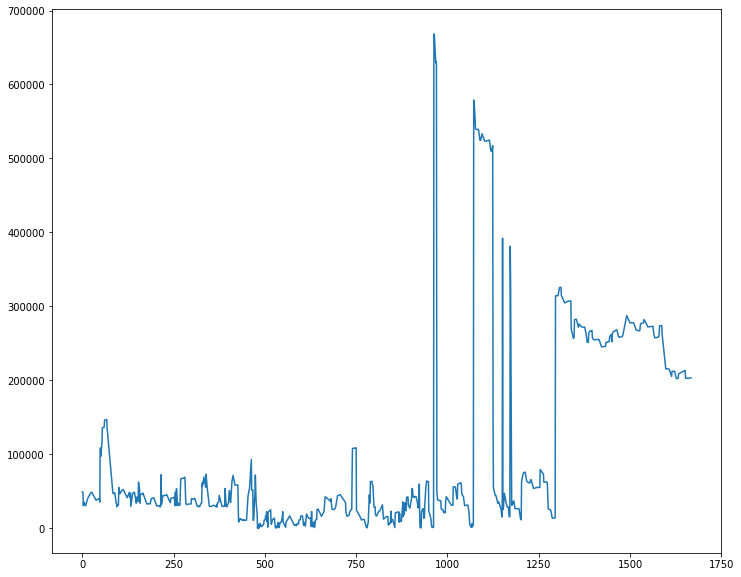

In [67]:
orden["Saldo"].plot(figsize=(12,10))

In [68]:
gastos = nomina.loc[nomina["Importe"] > 50000, ["Concepto", "Nota", "Importe"]]
gastos


,Concepto,Nota,Importe
68,Abono pago de nomina,Pago de nomina,89116.47
750,Abono pago de nomina,Pago de nomina,84562.91
970,Liquidacion inversion plazo,NaN,575000.00
1124,Liquidacion inversion plazo,NaN,379832.07
1125,Abono pago de nomina,Pago de nomina,83388.39
1151,Liquidacion inversion plazo,NaN,367144.04
1172,Liquidacion inversion plazo,NaN,50017.08
1173,Liquidacion inversion plazo,NaN,300612.82


<AxesSubplot: xlabel='Concepto'>

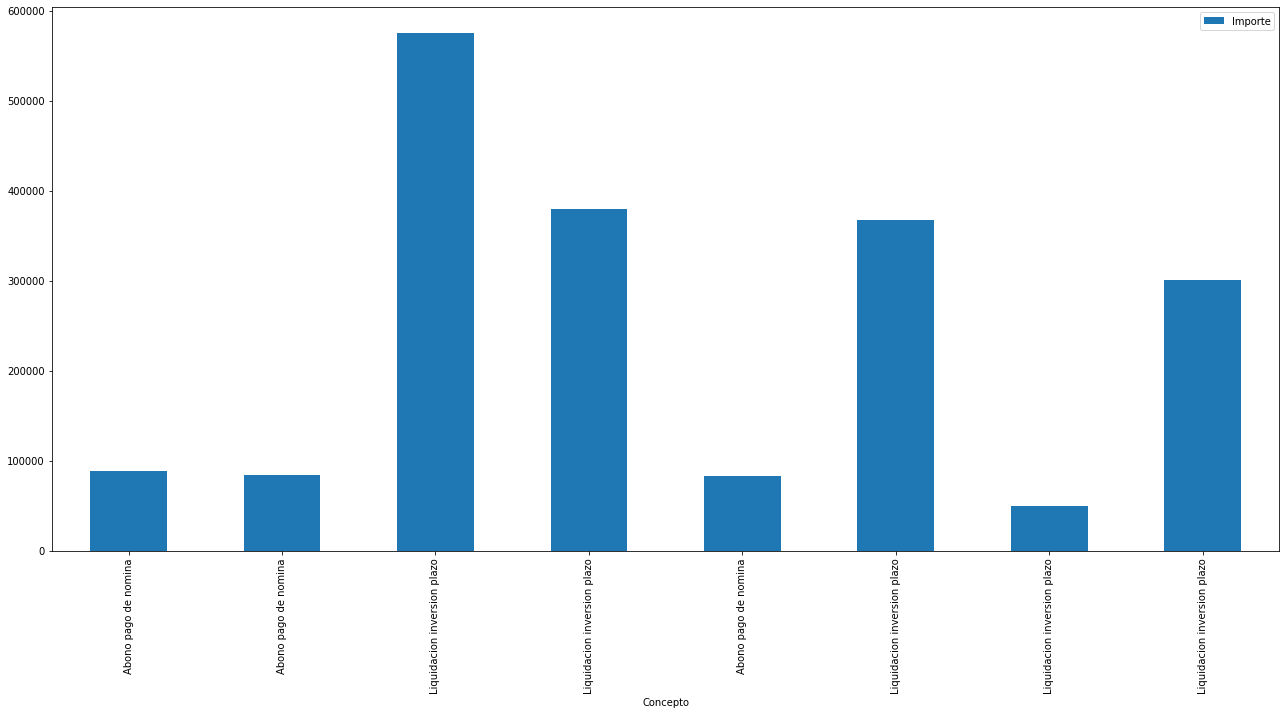

In [19]:
gastos.plot.bar(figsize=(22,10), x="Concepto")

In [20]:
aeromexico[aeromexico["Importe"]< -5000].head(13)

,Fecha valor,Fecha de operación,Importe,Moneda,Concepto,Entidad,Nombre de producto,Tipo de producto,Tipo de movimiento,Categoría,Nota
80,2022-05-18,NaT,-6354.00,MXN,Avianca w,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Transporte,999
757,2021-05-23,NaT,-13699.50,MXN,Tamarindo co,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Espectáculos,999
758,2021-05-23,NaT,-6905.00,MXN,Tamarindo co,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Espectáculos,999
865,2021-02-13,NaT,-8385.79,MXN,Home depot revolucion,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Mantenimiento hogar,999
886,2021-01-23,NaT,-17499.00,MXN,Elizondo la rioja,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Restaurante,999
918,2020-12-11,NaT,-6800.00,MXN,Quality cocinas,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,No computable,Tarjeta crédito,999
1134,2020-05-12,NaT,-5010.00,MXN,Udem edu mx,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Restaurante,999
1260,2019-12-28,NaT,-12338.80,MXN,Royal caribbean cruises,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Hotel,890
1277,2019-12-16,NaT,-5126.23,MXN,Udem,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Educación,999
1378,2019-10-15,NaT,-19982.64,MXN,Royal caribbean cruises,Santander México,AEROMEXICO BLANCA,Tarjeta de crédito,Gasto,Hotel,890
